## Часть 1
Напишите скрипт, который скачивает все данные с выборов губернатора СПб 2019г для всех избирательных участков. 

Входная точка [по ссылке](http://notelections.online/region/region/st-petersburg?action=show&root=1&tvd=27820001217417&vrn=27820001217413&region=78&global=&sub_region=78&prver=0&pronetvd=null&vibid=27820001217417&type=222). Затем нужно перейти на сайты территориальных избирательных комиссий. Результаты нужно сохранить в  `cvs`-файл, `sqlite` базе данных или `parquet`-файле. В итоге должна получиться таблица с полями:
- название ТИК (территориальная избирательная комиссия, некоторое объединение избирательных участков на определенной территории)
- номер УИК (избирательный участок)
- 14 стандартных полей из итогового протокола

Скрипт должен быть в отдельном `*.py` файле или в отдельном `jupyter`-ноутбуке. 

### Часть 2
Используя скаченные данные и `Pandas` (или `PySpark`) посчитайте:
- явку (%) по всем ТИК, результат отсортировать по убыванию
- выберите произвольного кандидата и найдите тот избиратльный участок, на котором он получил наибольший результат  (%, учитывать участки на которых проголосовало больше 100 человек)
- найдите ТИК, где разница между УИК с наибольшей явкой и наименьшей максимальна
- посчитайте дисперсию по явке для каждого ТИК (учитывать УИК)
- для каждого кандидата посчитайте таблицу: результат (%, округленный до целого) - количество УИК, на которых кандидат получил данный результат
- визуализируйте отношение - явка на УИК $\rightarrow$ результат кандидата. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('../data/df_5_task.csv')


Явка

In [2]:
df['Явка'] = (df['Число избирательных бюллетеней, содержащихся в переносных ящиках для голосования'] + df['Число избирательных бюллетеней, содержащихся в стационарных ящиках для голосования']) / df['Число избирателей, внесенных в список избирателей на момент окончания голосования']
df.sort_values('Явка', ascending=False, inplace=True)
df

,ТИК,УИК,"Число избирателей, внесенных в список избирателей на момент окончания голосования","Число избирательных бюллетеней, полученных участковой избирательной комиссией","Число избирательных бюллетеней, выданных избирателям в помещении для голосования в день голосования","Число избирательных бюллетеней, выданных избирателям, проголосовавшим вне помещения для голосования",Число погашенных избирательных бюллетеней,"Число избирательных бюллетеней, содержащихся в переносных ящиках для голосования","Число избирательных бюллетеней, содержащихся в стационарных ящиках для голосования",Число недействительных избирательных бюллетеней,Число действительных избирательных бюллетеней,Число утраченных избирательных бюллетеней,"Число избирательных бюллетеней, не учтенных при получении",Амосов Михаил Иванович,Беглов Александр Дмитриевич,Тихонова Надежда Геннадьевна,Явка
1267,Территориальная избирательная комиссия №20,УИК №1983,169,169,93,76,0,76,93,3,166,0,0,9,152,5,1.000000
146,Территориальная избирательная комиссия №2,УИК №2308,300,300,287,13,0,13,287,5,295,0,0,11,269,15,1.000000
1455,Территориальная избирательная комиссия №22,УИК №405,346,500,335,11,154,11,335,6,340,0,0,3,332,5,1.000000
1095,Территориальная избирательная комиссия №17,УИК №2284,235,500,235,0,265,0,235,11,224,0,0,17,165,42,1.000000
1454,Территориальная избирательная комиссия №22,УИК №404,638,1000,308,330,362,330,308,13,625,0,0,8,595,22,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279,Территориальная избирательная комиссия №5,УИК №1424,1814,1700,320,1,1379,1,320,6,315,0,0,45,225,45,0.176957
475,Территориальная избирательная комиссия №6,УИК №1139,1848,1500,317,3,1180,3,317,10,310,0,0,53,186,71,0.173160
1756,Территориальная избирательная комиссия №26,УИК №1215,1959,2000,331,8,1661,8,331,9,330,0,0,62,194,74,0.173047
647,Территориальная избирательная комиссия №10,УИК №203,859,800,143,1,656,1,143,7,137,0,0,37,71,29,0.167637


Амосов

In [3]:
df['Проголосовало человек'] = (df['Число избирательных бюллетеней, содержащихся в переносных ящиках для голосования'] + df['Число избирательных бюллетеней, содержащихся в стационарных ящиках для голосования'])
df.loc[df['Проголосовало человек'] > 100, 'Амосов %'] = round(df['Амосов Михаил Иванович'] / df['Проголосовало человек'] * 100, 1)
df.sort_values('Амосов %', ascending=False, inplace=True)
df

,ТИК,УИК,"Число избирателей, внесенных в список избирателей на момент окончания голосования","Число избирательных бюллетеней, полученных участковой избирательной комиссией","Число избирательных бюллетеней, выданных избирателям в помещении для голосования в день голосования","Число избирательных бюллетеней, выданных избирателям, проголосовавшим вне помещения для голосования",Число погашенных избирательных бюллетеней,"Число избирательных бюллетеней, содержащихся в переносных ящиках для голосования","Число избирательных бюллетеней, содержащихся в стационарных ящиках для голосования",Число недействительных избирательных бюллетеней,Число действительных избирательных бюллетеней,Число утраченных избирательных бюллетеней,"Число избирательных бюллетеней, не учтенных при получении",Амосов Михаил Иванович,Беглов Александр Дмитриевич,Тихонова Надежда Геннадьевна,Явка,Проголосовало человек,Амосов %
2021,Цифровые избирательные участки,Цифровые избирательные участки,535,402,402,0,0,0,400,3,397,0,0,194,82,121,0.747664,400,48.5
1085,Территориальная избирательная комиссия №17,УИК №567,2206,2000,635,8,1357,8,635,25,618,0,0,267,284,67,0.291478,643,41.5
1089,Территориальная избирательная комиссия №17,УИК №571,1394,1000,471,3,526,3,421,10,414,0,0,152,166,96,0.304161,424,35.8
1080,Территориальная избирательная комиссия №17,УИК №562,2572,2000,760,1,1239,1,726,25,702,0,0,259,336,107,0.282659,727,35.6
1084,Территориальная избирательная комиссия №17,УИК №566,2634,2000,704,6,1290,6,704,15,695,0,0,252,336,107,0.269552,710,35.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1610,Территориальная избирательная комиссия №24,УИК №2330,118,200,81,5,114,5,81,4,82,0,0,5,66,11,0.728814,86,NaN
976,Территориальная избирательная комиссия №15,УИК №2363,145,200,100,0,100,0,100,1,99,0,0,14,74,11,0.689655,100,NaN
1378,Территориальная избирательная комиссия №21,УИК №2345,178,250,96,1,153,1,96,4,93,0,0,0,88,5,0.544944,97,NaN
883,Территориальная избирательная комиссия №13,УИК №1270,94,80,45,3,32,3,45,1,47,0,0,3,39,5,0.510638,48,NaN


ТИК, где разница между УИК с наибольшей явкой и наименьшей максимальна

In [4]:
print((df.groupby('ТИК')['Явка'].max() - df.groupby('ТИК')['Явка'].min()).idxmax())
print((df.groupby('ТИК')['Явка'].max() - df.groupby('ТИК')['Явка'].min()).max())

Территориальная избирательная комиссия №17
0.8204196933010492


дисперсия по явке для каждого ТИК

In [5]:
df.groupby('ТИК')['Явка'].var().sort_values()

ТИК
Территориальная избирательная комиссия №25    0.000844
Территориальная избирательная комиссия №6     0.002043
Территориальная избирательная комиссия №14    0.003146
Территориальная избирательная комиссия №12    0.003220
Территориальная избирательная комиссия №7     0.006799
Территориальная избирательная комиссия №3     0.007303
Территориальная избирательная комиссия №10    0.007428
Территориальная избирательная комиссия №16    0.011306
Территориальная избирательная комиссия №9     0.011464
Территориальная избирательная комиссия №5     0.013666
Территориальная избирательная комиссия №20    0.017360
Территориальная избирательная комиссия №1     0.019176
Территориальная избирательная комиссия №19    0.020498
Территориальная избирательная комиссия №27    0.020655
Территориальная избирательная комиссия №26    0.022018
Территориальная избирательная комиссия №4     0.022297
Территориальная избирательная комиссия №18    0.024045
Территориальная избирательная комиссия №11    0.024049
Террит

In [6]:
df['Амосов %'] = df['Амосов Михаил Иванович'] / df['Проголосовало человек']
df['Беглов %'] = df['Беглов Александр Дмитриевич'] / df['Проголосовало человек']
df['Тихонова %'] = df['Тихонова Надежда Геннадьевна'] / df['Проголосовало человек']
print(df.groupby('Амосов %').count()['УИК'].sort_values(ascending=False))
print(df.groupby('Беглов %').count()['УИК'].sort_values(ascending=False))
print(df.groupby('Тихонова %').count()['УИК'].sort_values(ascending=False))


Амосов %
0.111111    6
0.142857    6
0.200000    5
0.166667    5
0.089947    4
           ..
0.183301    1
0.183303    1
0.183369    1
0.183544    1
0.000000    1
Name: УИК, Length: 1908, dtype: int64
Беглов %
0.600000    8
0.750000    6
0.666667    4
0.625000    3
0.500000    3
           ..
0.673961    1
0.674027    1
0.674107    1
0.674157    1
0.205000    1
Name: УИК, Length: 1937, dtype: int64
Тихонова %
0.190476    7
0.181818    5
0.200000    5
0.172414    4
0.142857    4
           ..
0.188192    1
0.188356    1
0.188389    1
0.188470    1
0.171429    1
Name: УИК, Length: 1895, dtype: int64


явка на УИК  → результат кандидата(Амосов)

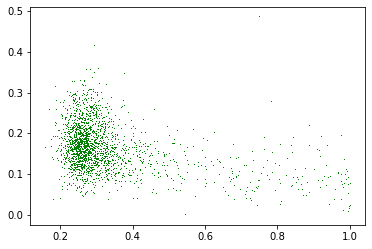

In [35]:
plt.plot(df.groupby('Явка')['Амосов %'].mean(),',g')